In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
import datetime as dt

/Users/sidx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Data source: 'https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv'

In [3]:
df = pd.read_csv('covid-data.csv')

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [5]:
# Lets see the size of the data-set
df.shape

(51798, 41)

In [6]:
# Check number of dates each country has given Covid data
df['location'].value_counts()

India              297
San Marino         297
South Korea        297
Georgia            297
Iran               297
                  ... 
Tajikistan         175
Comoros            174
Lesotho            161
Hong Kong           51
Solomon Islands      7
Name: location, Length: 213, dtype: int64

In [7]:
# Find the statistical description of the data-set's categorical columns
df.describe(include='O')

,iso_code,continent,location,date,tests_units
count,51501,51204,51798,51798,22612
unique,212,6,213,297,5
top,CAN,Europe,India,2020-09-04,tests performed
freq,297,13496,297,212,12748


In [8]:
# Lets check the Null values present in the data-set
df.isna().any()

iso_code                            True
continent                           True
location                           False
date                               False
total_cases                         True
new_cases                           True
new_cases_smoothed                  True
total_deaths                        True
new_deaths                          True
new_deaths_smoothed                 True
total_cases_per_million             True
new_cases_per_million               True
new_cases_smoothed_per_million      True
total_deaths_per_million            True
new_deaths_per_million              True
new_deaths_smoothed_per_million     True
total_tests                         True
new_tests                           True
total_tests_per_thousand            True
new_tests_per_thousand              True
new_tests_smoothed                  True
new_tests_smoothed_per_thousand     True
tests_per_case                      True
positive_rate                       True
tests_units     

In [9]:
# We notice only Location and Date have been consistent in data.
# Lets see the total NaN values in each columns

df.isnull().sum()

iso_code                             297
continent                            594
location                               0
date                                   0
total_cases                         3607
new_cases                            882
new_cases_smoothed                  1670
total_deaths                       12432
new_deaths                           882
new_deaths_smoothed                 1670
total_cases_per_million             3868
new_cases_per_million                946
new_cases_smoothed_per_million      1735
total_deaths_per_million           12678
new_deaths_per_million               946
new_deaths_smoothed_per_million     1735
total_tests                        32172
new_tests                          32522
total_tests_per_thousand           32172
new_tests_per_thousand             32522
new_tests_smoothed                 30137
new_tests_smoothed_per_thousand    30137
tests_per_case                     31830
positive_rate                      31486
tests_units     

In [10]:
# Extract US data

US_Covid = df[df['location'] == 'United States']

In [11]:
US_Covid['total_cases'] = US_Covid['total_cases'].fillna(value=0)
US_Covid.head()

/Users/sidx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
48188,USA,North America,United States,2019-12-31,0.0,0.0,NaN,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48189,USA,North America,United States,2020-01-01,0.0,0.0,NaN,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48190,USA,North America,United States,2020-01-02,0.0,0.0,NaN,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48191,USA,North America,United States,2020-01-03,0.0,0.0,NaN,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48192,USA,North America,United States,2020-01-04,0.0,0.0,NaN,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924


In [12]:
US_Covid.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
48480,USA,North America,United States,2020-10-18,8106752.0,56611.0,55400.714,219289.0,690.0,701.714,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48481,USA,North America,United States,2020-10-19,8154595.0,47843.0,56007.286,219674.0,385.0,700.429,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48482,USA,North America,United States,2020-10-20,8214755.0,60160.0,58651.143,220133.0,459.0,721.143,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48483,USA,North America,United States,2020-10-21,8273304.0,58549.0,59512.857,221066.0,933.0,737.714,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48484,USA,North America,United States,2020-10-22,8336282.0,62978.0,60026.000,222201.0,1135.0,761.286,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924


In [13]:
# Lets plot cases day-by-day

Text(0, 0.5, 'Number of cases')

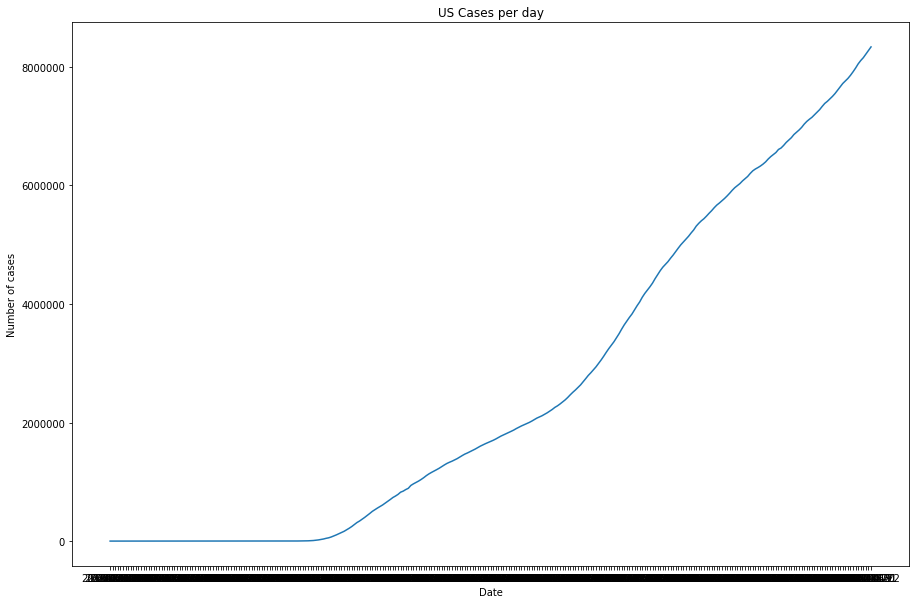

In [14]:
plt.figure(figsize=(15,10))
sns.lineplot(x = 'date', y='total_cases', data = US_Covid)
plt.title("US Cases per day")
plt.xlabel('Date')
plt.ylabel('Number of cases')

In [15]:
# Lets analyze the last 10 days of cases in the US

US_Covid_Last_10_Days = US_Covid.tail(10)

Text(0, 0.5, 'Number of cases')

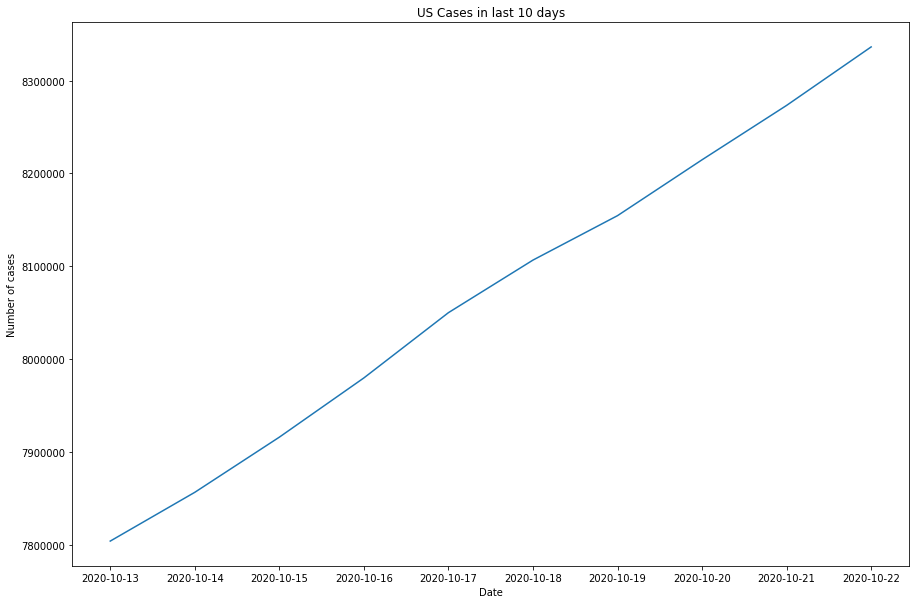

In [16]:
plt.figure(figsize=(15,10))
sns.lineplot(x = 'date', y='total_cases', data = US_Covid_Last_10_Days)
plt.title("US Cases in last 10 days")
plt.xlabel('Date')
plt.ylabel('Number of cases')

Text(0, 0.5, 'Number of tests')

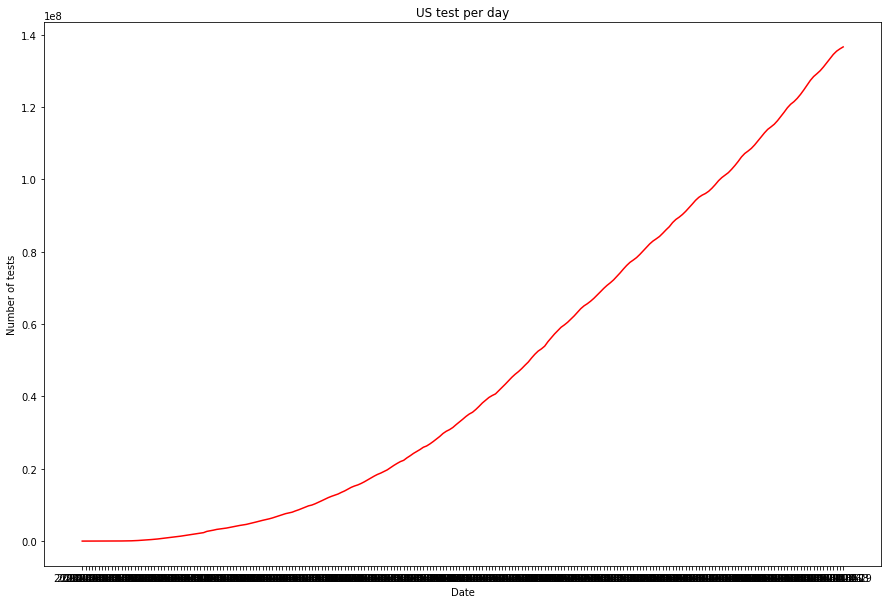

In [17]:
# Lets analyze the total tests done by the US:
plt.figure(figsize=(15,10))
sns.lineplot(x = 'date', y='total_tests', data = US_Covid, color='red')
plt.title("US test per day")
plt.xlabel('Date')
plt.ylabel('Number of tests')

Text(0, 0.5, 'Number of test')

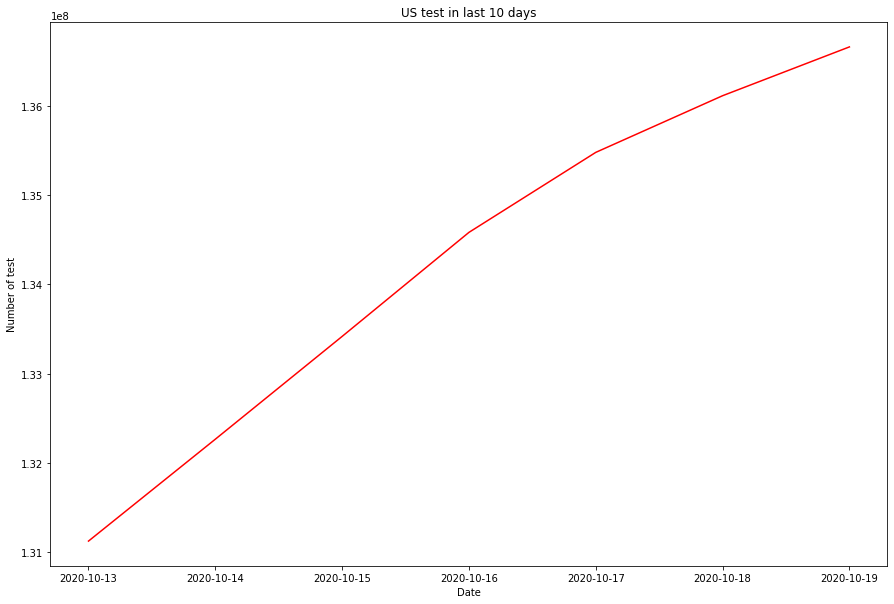

In [18]:
# US Tests in the last 10 days
plt.figure(figsize=(15,10))
sns.lineplot(x = 'date', y='total_tests', data = US_Covid_Last_10_Days, color='red')
plt.title("US test in last 10 days")
plt.xlabel('Date')
plt.ylabel('Number of test')

In [19]:
# ----- B -----

In [20]:
# Extract Taiwan data

Taiwan_Covid = df[df['location'] == 'Taiwan']

In [21]:
Taiwan_Covid_Last_10_Days = Taiwan_Covid.tail(10)

Text(0, 0.5, 'Number of cases')

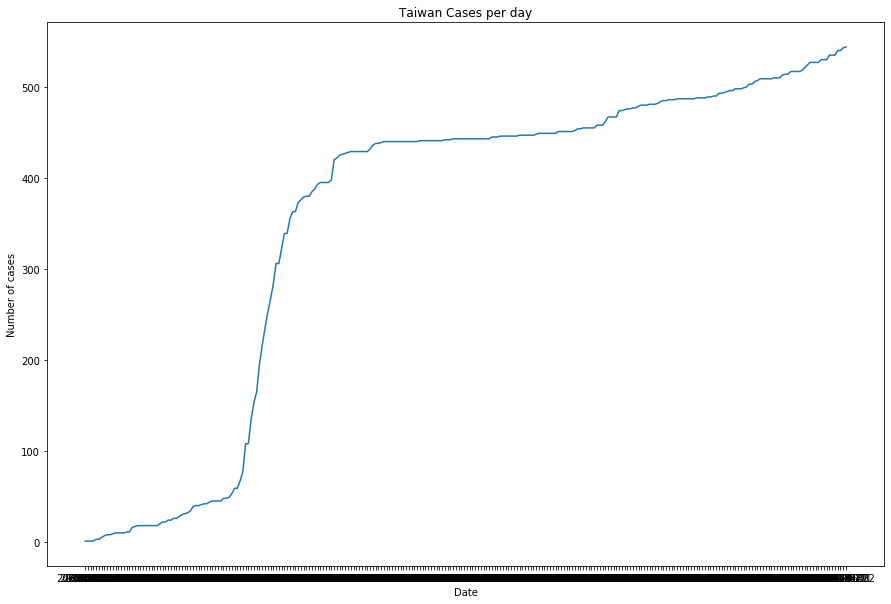

In [22]:
# Taiwan's Covid journey so far:
plt.figure(figsize=(15,10))
sns.lineplot(x = 'date', y='total_cases', data = Taiwan_Covid)
plt.title("Taiwan Cases per day")
plt.xlabel('Date')
plt.ylabel('Number of cases')

Text(0, 0.5, 'Number of cases')

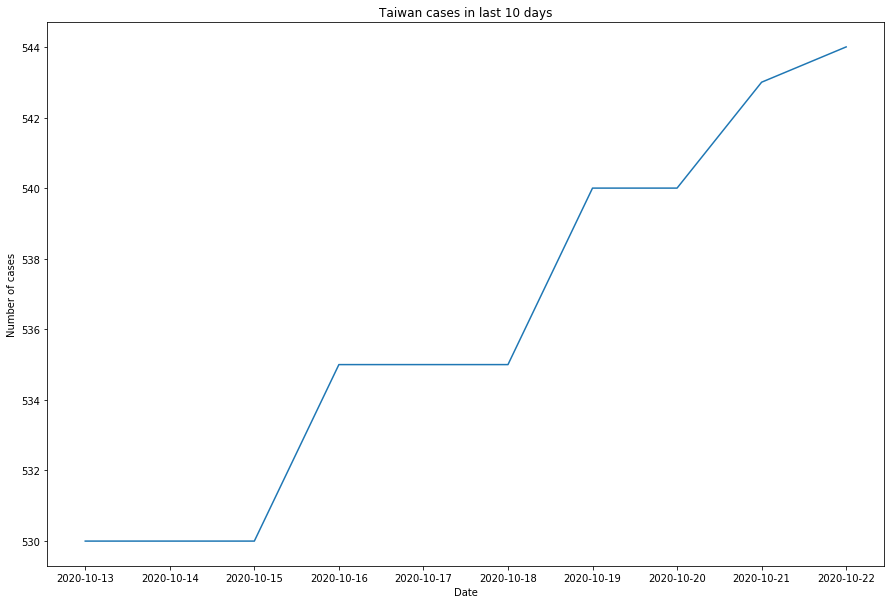

In [23]:
# Taiwan's last 10 days with Covid:

plt.figure(figsize=(15,10))
sns.lineplot(x = 'date', y='total_cases', data = Taiwan_Covid_Last_10_Days)
plt.title("Taiwan cases in last 10 days")
plt.xlabel('Date')
plt.ylabel('Number of cases')

Text(0, 0.5, 'Number of tests')

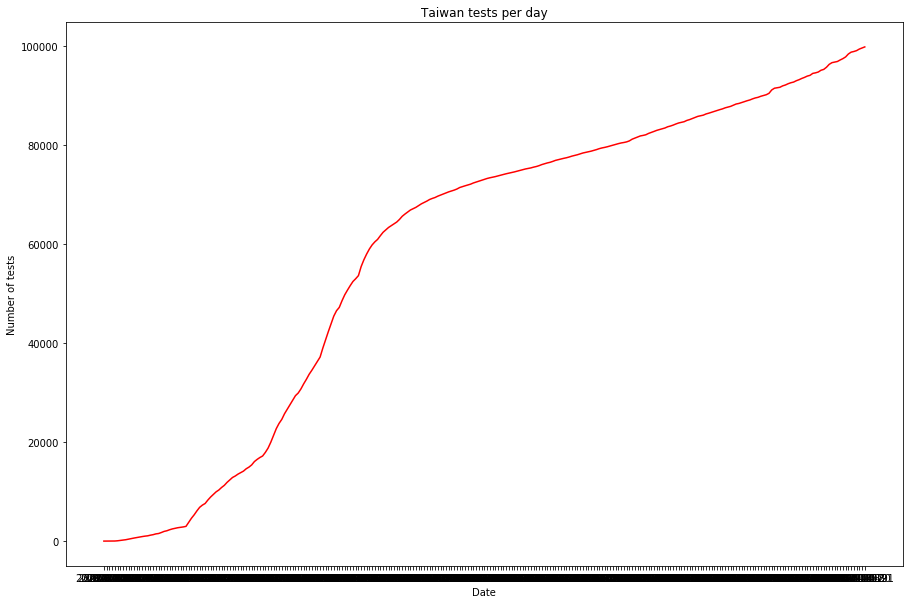

In [24]:
# Taiwan's testing since Covid began:
plt.figure(figsize=(15,10))
sns.lineplot(x = 'date', y='total_tests', data = Taiwan_Covid, color='red')
plt.title("Taiwan tests per day")
plt.xlabel('Date')
plt.ylabel('Number of tests')

Text(0, 0.5, 'Number of tests')

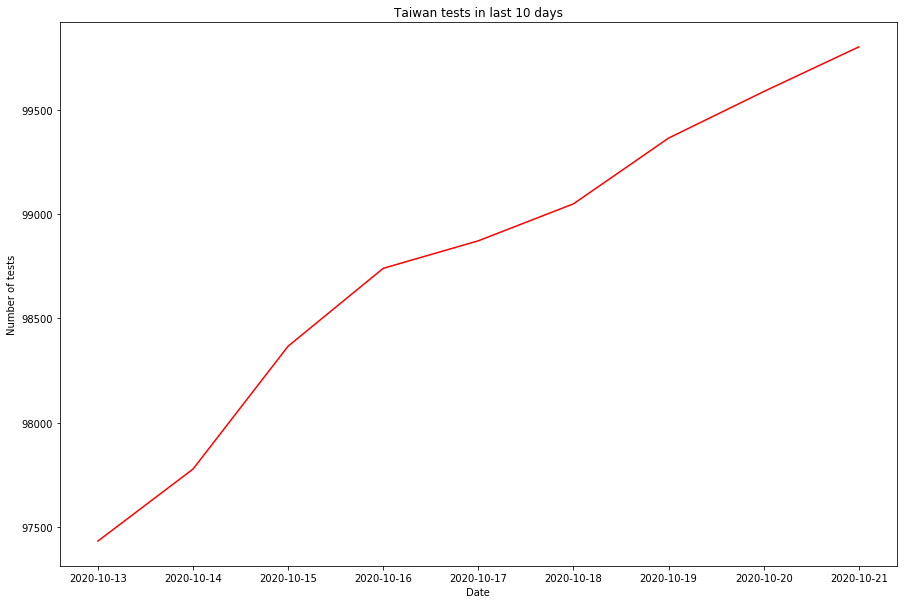

In [25]:
# Taiwan Tests in the last 10 days
plt.figure(figsize=(15,10))
sns.lineplot(x = 'date', y='total_tests', data = Taiwan_Covid_Last_10_Days, color='red')
plt.title("Taiwan tests in last 10 days")
plt.xlabel('Date')
plt.ylabel('Number of tests')

In [26]:
# Comparing US, Canada, and New Zealand

In [27]:
US_Canada_NewZealand = df[(df['location'] == 'United States') | (df['location'] == 'Canada') | (df['location'] == 'New Zealand')]

In [28]:
US_Canada_NewZealand

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
8029,CAN,North America,Canada,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.50,82.43,0.926
8030,CAN,North America,Canada,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.50,82.43,0.926
8031,CAN,North America,Canada,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.50,82.43,0.926
8032,CAN,North America,Canada,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.50,82.43,0.926
8033,CAN,North America,Canada,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,44017.591,0.5,105.599,7.37,12.0,16.6,NaN,2.50,82.43,0.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48480,USA,North America,United States,2020-10-18,8106752.0,56611.0,55400.714,219289.0,690.0,701.714,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48481,USA,North America,United States,2020-10-19,8154595.0,47843.0,56007.286,219674.0,385.0,700.429,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48482,USA,North America,United States,2020-10-20,8214755.0,60160.0,58651.143,220133.0,459.0,721.143,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48483,USA,North America,United States,2020-10-21,8273304.0,58549.0,59512.857,221066.0,933.0,737.714,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924


In [29]:
# Comparing US vs Canada vs New Zealand

Text(0, 0.5, 'Number of cases')

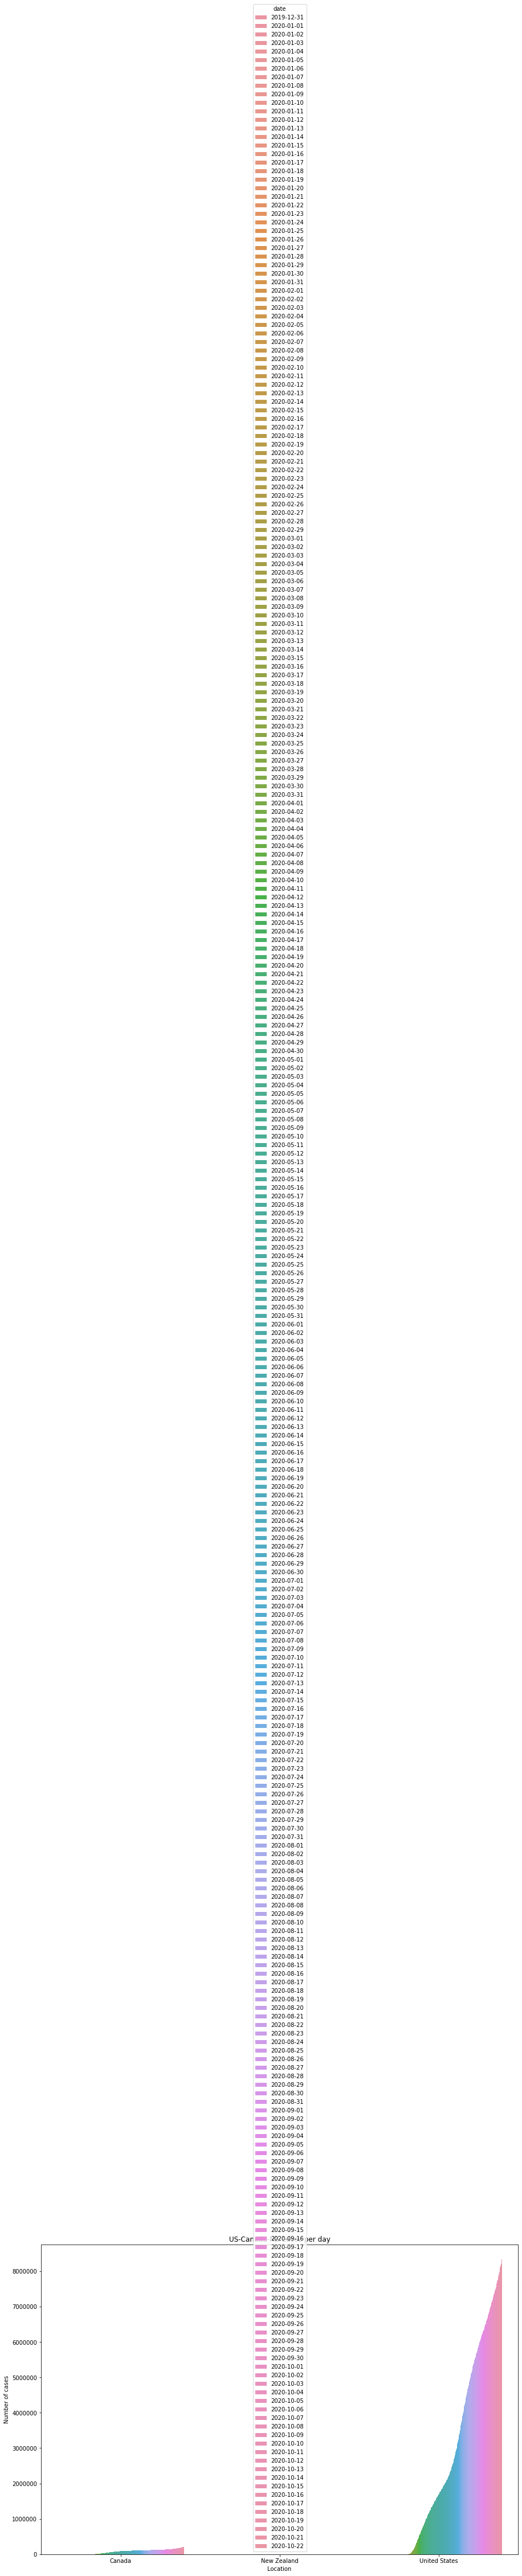

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'location', y='total_cases', data = US_Canada_NewZealand, hue='date')
plt.title("US-Canada-NZ Cases per day")
plt.xlabel('Location')
plt.ylabel('Number of cases')

In [31]:
# ---- ----
# Comparing Spain and Germany

Germany_Spain_df = df[(df['location'] == 'Spain') | (df['location'] == 'Germany')]

Text(0, 0.5, 'Number of cases')

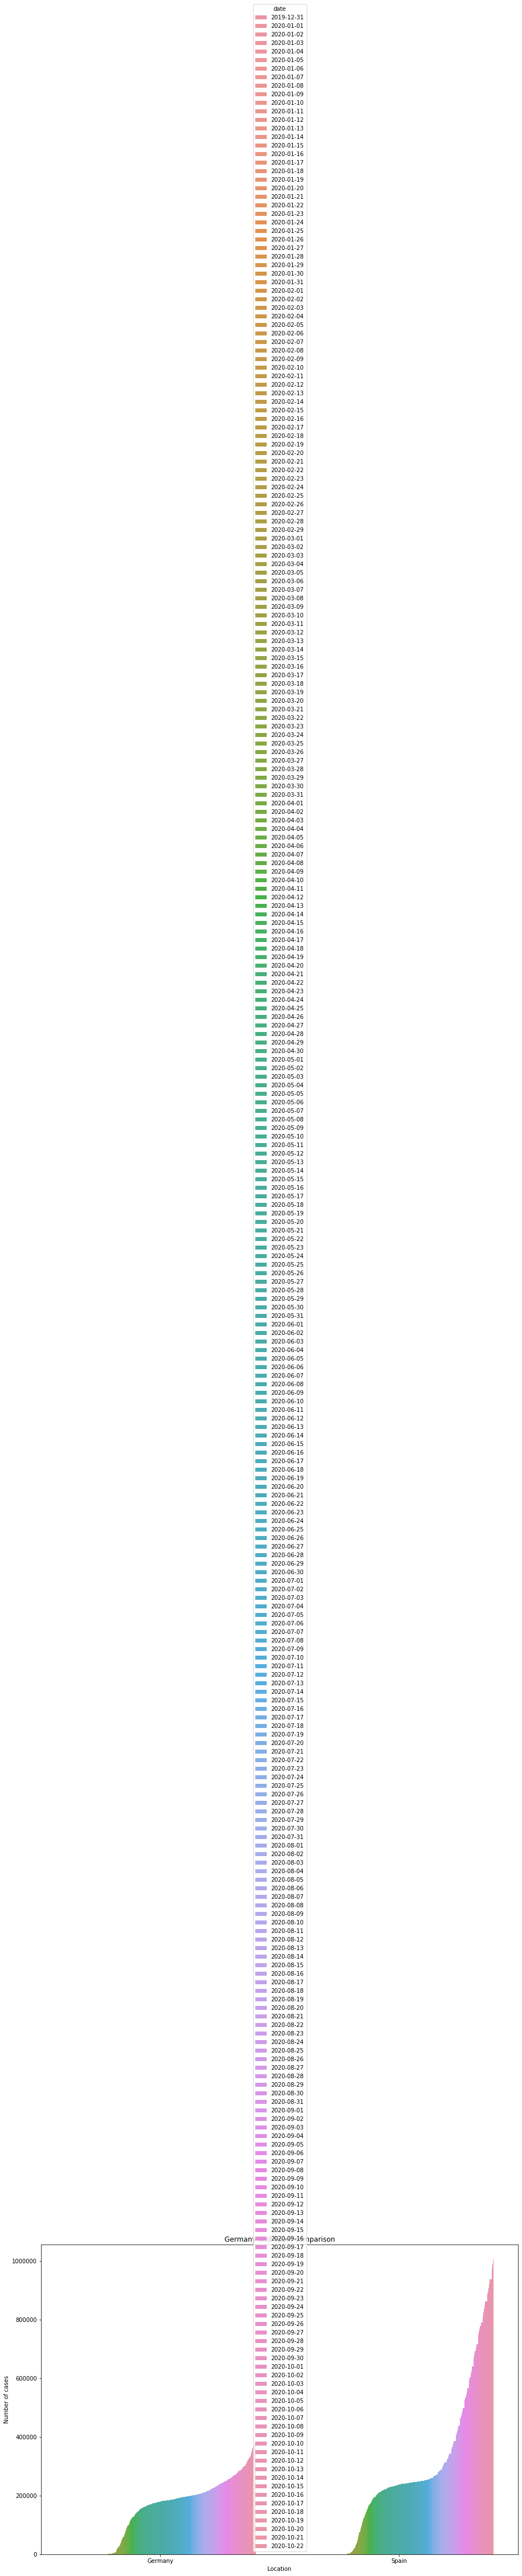

In [32]:
# Comparing Spain vs Germany

plt.figure(figsize=(15,10))
sns.barplot(x = 'location', y='total_cases', data = Germany_Spain_df, hue='date')
plt.title("Germany and Spain comparison")
plt.xlabel('Location')
plt.ylabel('Number of cases')

In [33]:
# Cases on the most recent day (Oct 22nd when the data set was downloaded):

last_day = len(df)-1
Recent_Covid_data = df[df['date']=="2020-10-22"]
Recent_Covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
218,ABW,North America,Aruba,2020-10-22,4369.0,14.0,16.286,35.0,1.0,0.429,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
515,AFG,Asia,Afghanistan,2020-10-22,40510.0,135.0,69.143,1501.0,2.0,2.857,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498
730,AGO,Africa,Angola,2020-10-22,8049.0,220.0,195.571,251.0,3.0,4.143,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
940,AIA,North America,Anguilla,2020-10-22,3.0,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.88,NaN
1168,ALB,Europe,Albania,2020-10-22,17948.0,297.0,284.714,462.0,4.0,4.000,...,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50769,ZAF,Africa,South Africa,2020-10-22,708359.0,2055.0,1706.429,18741.0,85.0,84.286,...,12294.876,18.9,200.380,5.52,8.100,33.200,43.993,2.320,64.13,0.699
50987,ZMB,Africa,Zambia,2020-10-22,16000.0,18.0,54.857,346.0,0.0,0.143,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588
51203,ZWE,Africa,Zimbabwe,2020-10-22,8215.0,28.0,22.857,236.0,3.0,0.714,...,1899.775,21.4,307.846,1.82,1.600,30.700,36.791,1.700,61.49,0.535
51500,OWID_WRL,NaN,World,2020-10-22,41299301.0,411972.0,380104.429,1132500.0,6542.0,5592.286,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN


In [34]:
# Lets see the order of countries with most-to-least cases:

Country_Cases = Recent_Covid_data.sort_values(by='total_cases', ascending=False)

In [35]:
Country_Cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
51500,OWID_WRL,NaN,World,2020-10-22,41299301.0,411972.0,380104.429,1132500.0,6542.0,5592.286,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.13,2.705,72.58,NaN
48484,USA,North America,United States,2020-10-22,8336282.0,62978.0,60026.000,222201.0,1135.0,761.286,...,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.924
22391,IND,Asia,India,2020-10-22,7706946.0,55839.0,57121.286,116616.0,702.0,764.286,...,6426.674,21.2,282.280,10.39,1.900,20.600,59.55,0.530,69.66,0.640
6931,BRA,South America,Brazil,2020-10-22,5298772.0,24818.0,22558.429,155403.0,566.0,522.286,...,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88,0.759
40319,RUS,Europe,Russia,2020-10-22,1447335.0,15700.0,15275.143,24952.0,317.0,249.571,...,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050,72.58,0.816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19871,GRL,North America,Greenland,2020-10-22,16.0,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,199.941,2.16,NaN,NaN,NaN,NaN,71.70,NaN
33422,MSR,North America,Montserrat,2020-10-22,13.0,0.0,0.000,1.0,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.16,NaN
16268,FLK,South America,Falkland Islands,2020-10-22,13.0,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.44,NaN
940,AIA,North America,Anguilla,2020-10-22,3.0,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.88,NaN


In [36]:
# Top 5 countries with cases:
Country_Cases[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
48484,USA,North America,United States,2020-10-22,8336282.0,62978.0,60026.000,222201.0,1135.0,761.286,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
22391,IND,Asia,India,2020-10-22,7706946.0,55839.0,57121.286,116616.0,702.0,764.286,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.640
6931,BRA,South America,Brazil,2020-10-22,5298772.0,24818.0,22558.429,155403.0,566.0,522.286,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
40319,RUS,Europe,Russia,2020-10-22,1447335.0,15700.0,15275.143,24952.0,317.0,249.571,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816
1926,ARG,South America,Argentina,2020-10-22,1037312.0,18326.0,15051.143,27519.0,419.0,371.143,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.825


Text(0, 0.5, 'Number of cases')

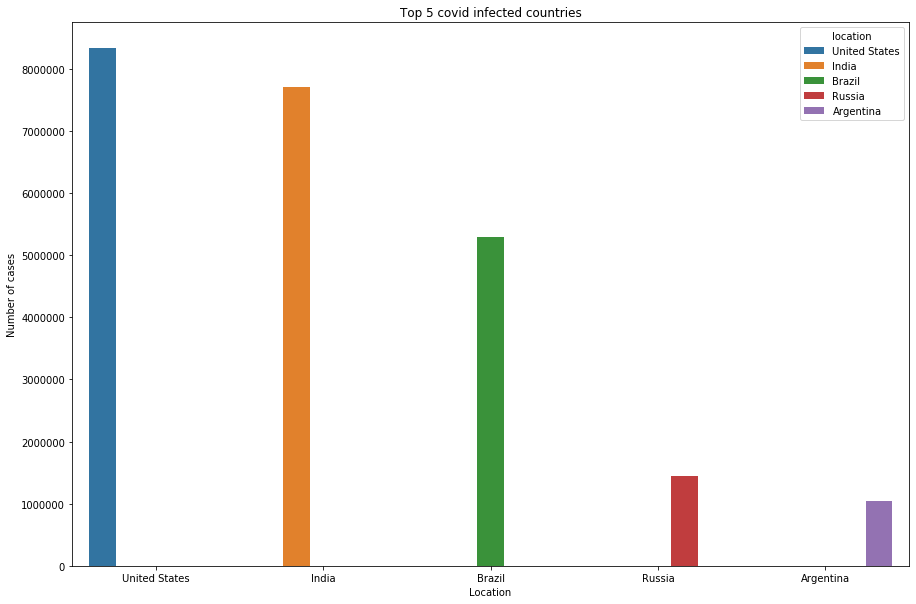

In [37]:
# Lets plot these countries:
plt.figure(figsize=(15,10))
plt.title("Top 5 covid infected countries")
sns.barplot(x='location', y = 'total_cases', data = Country_Cases[1:6], hue = 'location')
plt.xlabel('Location')
plt.ylabel('Number of cases')

In [38]:
US_Covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
48188,USA,North America,United States,2019-12-31,0.0,0.0,NaN,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48189,USA,North America,United States,2020-01-01,0.0,0.0,NaN,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48190,USA,North America,United States,2020-01-02,0.0,0.0,NaN,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48191,USA,North America,United States,2020-01-03,0.0,0.0,NaN,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48192,USA,North America,United States,2020-01-04,0.0,0.0,NaN,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48480,USA,North America,United States,2020-10-18,8106752.0,56611.0,55400.714,219289.0,690.0,701.714,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48481,USA,North America,United States,2020-10-19,8154595.0,47843.0,56007.286,219674.0,385.0,700.429,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48482,USA,North America,United States,2020-10-20,8214755.0,60160.0,58651.143,220133.0,459.0,721.143,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48483,USA,North America,United States,2020-10-21,8273304.0,58549.0,59512.857,221066.0,933.0,737.714,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924


In [39]:
US_Covid_LR = US_Covid.copy()
US_Covid_LR

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
48188,USA,North America,United States,2019-12-31,0.0,0.0,NaN,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48189,USA,North America,United States,2020-01-01,0.0,0.0,NaN,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48190,USA,North America,United States,2020-01-02,0.0,0.0,NaN,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48191,USA,North America,United States,2020-01-03,0.0,0.0,NaN,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48192,USA,North America,United States,2020-01-04,0.0,0.0,NaN,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48480,USA,North America,United States,2020-10-18,8106752.0,56611.0,55400.714,219289.0,690.0,701.714,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48481,USA,North America,United States,2020-10-19,8154595.0,47843.0,56007.286,219674.0,385.0,700.429,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48482,USA,North America,United States,2020-10-20,8214755.0,60160.0,58651.143,220133.0,459.0,721.143,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48483,USA,North America,United States,2020-10-21,8273304.0,58549.0,59512.857,221066.0,933.0,737.714,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924


# Now lets predict the future of Covid-19 in the US

In [40]:
# First we need to convert date in ordinal
US_Covid_LR['date'] = pd.to_datetime(US_Covid_LR['date'])
US_Covid_LR['date'] = US_Covid_LR['date'].map(dt.datetime.toordinal)
US_Covid_LR

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
48188,USA,North America,United States,737424,0.0,0.0,NaN,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48189,USA,North America,United States,737425,0.0,0.0,NaN,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48190,USA,North America,United States,737426,0.0,0.0,NaN,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48191,USA,North America,United States,737427,0.0,0.0,NaN,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48192,USA,North America,United States,737428,0.0,0.0,NaN,NaN,0.0,NaN,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48480,USA,North America,United States,737716,8106752.0,56611.0,55400.714,219289.0,690.0,701.714,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48481,USA,North America,United States,737717,8154595.0,47843.0,56007.286,219674.0,385.0,700.429,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48482,USA,North America,United States,737718,8214755.0,60160.0,58651.143,220133.0,459.0,721.143,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
48483,USA,North America,United States,737719,8273304.0,58549.0,59512.857,221066.0,933.0,737.714,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924


In [41]:
# Lets create our dependent and independent variables:
X = US_Covid_LR['date']
Y = US_Covid_LR['total_cases']
X = np.array(X).reshape(-1, 1)
Y = np.array(Y).reshape(-1, 1)

In [42]:
# Let's split our train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

In [43]:
# Lets create our Linear-Regression model:

model_LR = LinearRegression()
model_LR.fit(x_train, y_train)
model_LR.score(x_test, y_test)

0.8830327981708332

In [44]:
y_predicted = model_LR.predict(x_test)
MSE(y_test, y_predicted)

695308903179.6857

In [45]:
# Try time series analysis try edureka

In [46]:
# We notice the Linear-Regression model fails misreably given
# the high MSE.

In [47]:
# We will use Facebook's Prophet to analyze Time-Series data:

In [48]:
from fbprophet import Prophet

In [68]:
confirmed_cases = US_Covid.loc[: , ['date','total_cases']].copy()

In [72]:
confirmed_cases = confirmed_cases.reset_index().copy()
confirmed_cases.drop(['index'], axis=1, inplace=True)
confirmed_cases

,date,total_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
292,2020-10-18,8106752.0
293,2020-10-19,8154595.0
294,2020-10-20,8214755.0
295,2020-10-21,8273304.0


In [75]:
confirmed_cases.columns = ['ds', 'y'] # Input columns required by Prophet
confirmed_cases['ds'] = pd.to_datetime(confirmed_cases['ds']) # Convert date to date-time format
confirmed_cases

,ds,y
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
292,2020-10-18,8106752.0
293,2020-10-19,8154595.0
294,2020-10-20,8214755.0
295,2020-10-21,8273304.0


In [76]:
# Now we will try to forcast for a week with 95% confidence

In [82]:
model = Prophet(interval_width = 0.95)
model.fit(confirmed_cases)
future_dates = model.make_future_dataframe(periods = 7)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [83]:
future_dates

,ds
0,2019-12-31
1,2020-01-01
2,2020-01-02
3,2020-01-03
4,2020-01-04
...,...
299,2020-10-25
300,2020-10-26
301,2020-10-27
302,2020-10-28


In [80]:
# Now we jumped from 297 rows to 304 rows

In [81]:
# Lets find a range of cases, it gives us a tolerance for the forecast

In [86]:
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].round(2).tail(7)

,ds,yhat,yhat_lower,yhat_upper
297,2020-10-23,8226319.72,8179899.78,8272420.76
298,2020-10-24,8273767.26,8226658.01,8321754.87
299,2020-10-25,8318203.84,8274261.15,8363472.04
300,2020-10-26,8357882.28,8308033.16,8404819.06
301,2020-10-27,8398124.65,8351003.44,8447022.82
302,2020-10-28,8441091.07,8387071.87,8497060.24
303,2020-10-29,8484207.51,8423146.10,8539955.31


In [87]:
# Lets plot our forecast data

/Users/sidx/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/sidx/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


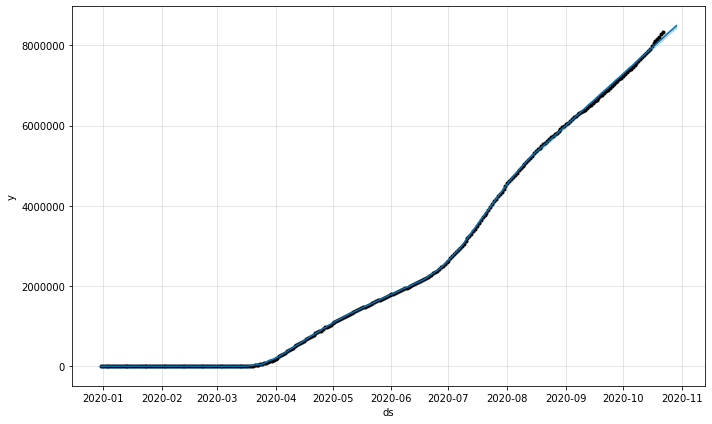

In [88]:
forecast_plot = model.plot(forecast)

/Users/sidx/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/sidx/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/sidx/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/sidx/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g.

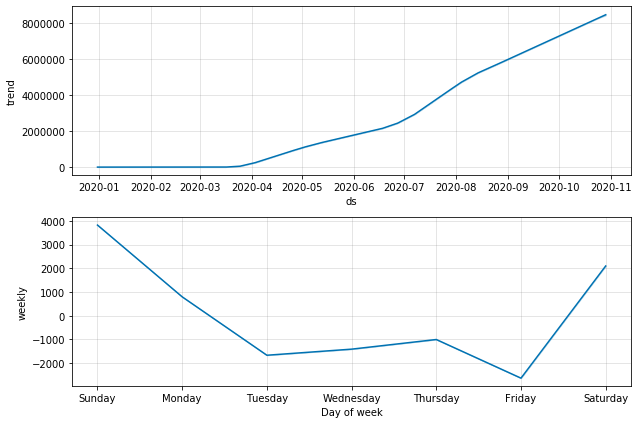

In [89]:
confirmed_forecast_plot = model.plot_components(forecast)

In [95]:
# Forecasting the death trend in the US

death_cases = US_Covid.loc[: , ['date','total_deaths']].copy()
death_cases = death_cases.reset_index().copy()
death_cases.drop(['index'], axis=1, inplace=True)
death_cases['total_deaths'] = death_cases['total_deaths'].fillna(value = 0)
death_cases.columns = ['ds', 'y'] # Input columns required by Prophet
death_cases['ds'] = pd.to_datetime(death_cases['ds']) # Convert date to date-time format
death_cases

,ds,y
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
292,2020-10-18,219289.0
293,2020-10-19,219674.0
294,2020-10-20,220133.0
295,2020-10-21,221066.0


In [97]:
# Lets fit our model again with death cases:
model_death = Prophet(interval_width = 0.95)
model_death.fit(death_cases)
future_death_dates = model_death.make_future_dataframe(periods = 7)
future_death_dates

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2019-12-31
1,2020-01-01
2,2020-01-02
3,2020-01-03
4,2020-01-04
...,...
299,2020-10-25
300,2020-10-26
301,2020-10-27
302,2020-10-28


In [98]:
# Now we jumped from 297 rows to 304 rows
# Lets find a range of death cases, it gives us a tolerance for the forecast
forecast_death = model_death.predict(future_dates)
forecast_death[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].round(2).tail(7)

,ds,yhat,yhat_lower,yhat_upper
297,2020-10-23,223626.69,222855.44,224306.92
298,2020-10-24,224477.71,223639.89,225273.96
299,2020-10-25,225173.91,224247.91,226021.21
300,2020-10-26,225616.91,224329.32,226693.56
301,2020-10-27,226105.13,224438.09,227304.06
302,2020-10-28,227000.56,224989.37,228669.27
303,2020-10-29,227990.48,225424.39,230214.14


/Users/sidx/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/sidx/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/sidx/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/sidx/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g.

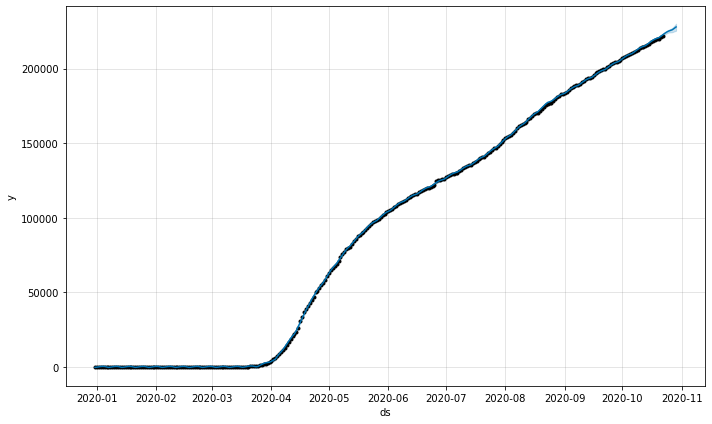

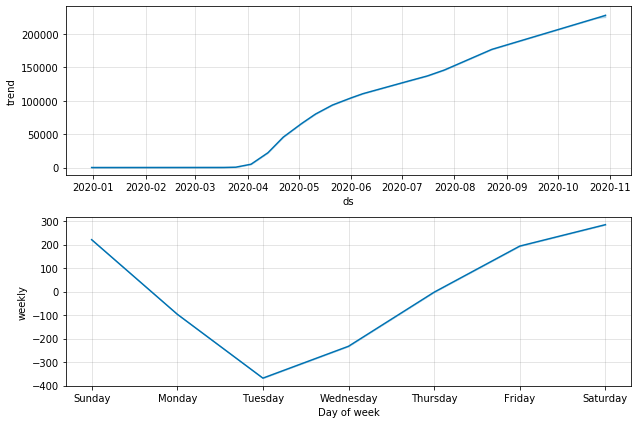

In [99]:
# Lets plot our forecasted deaths data

forecast_death_plot = model_death.plot(forecast_death)
death_forecast_plot = model_death.plot_components(forecast_death)